# Sales Prediction Summary

## 数据预览

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import math
from math import sqrt
from datetime import datetime,timedelta
import copy

In [36]:
xls=pd.ExcelFile('test.xlsx')
sheets=xls.sheet_names
table=xls.parse(sheets[3])#销售额
del table['租户ID']

In [38]:
table.head()

,2016-06-28 00:00:00,2016-06-29 00:00:00,2016-06-30 00:00:00,2016-07-01 00:00:00,2016-07-02 00:00:00,2016-07-03 00:00:00,2016-07-04 00:00:00,2016-07-05 00:00:00,2016-07-06 00:00:00,2016-07-07 00:00:00,...,2018-03-22 00:00:00,2018-03-23 00:00:00,2018-03-24 00:00:00,2018-03-25 00:00:00,2018-03-26 00:00:00,2018-03-27 00:00:00,2018-03-28 00:00:00,2018-03-29 00:00:00,2018-03-30 00:00:00,2018-03-31 00:00:00
0,42343.0,6840.2,24964.20,4025.0,31565.2,5635.0,2760.0,0.0,0.0,31579.0,...,4595.400,5368.200,0.000,3588.000,828.000,0.000,8441.000,0.000,3657.000,0.000
1,31293.8,9273.6,13545.16,1651.4,16895.8,16937.2,8031.6,16021.8,3491.4,21252.0,...,0.000,4186.000,1472.000,9726.700,1835.400,0.000,0.000,0.000,1610.000,2663.400
2,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,46676.614,46676.614,46676.614,46676.614,46676.614,46676.614,46676.614,46676.614,46676.614,46676.936
3,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,28944.396,28944.396,28944.396,28944.396,28944.396,28944.396,28944.396,28944.396,28944.396,28944.994
4,105068.6,41496.6,68457.20,81374.0,48612.8,71548.4,23377.2,9144.8,14600.4,17760.6,...,13767.800,910.800,15147.800,6430.800,35778.800,16146.000,24311.000,15837.800,5492.400,21334.800


### 预览2018年之前的销售额数据

In [40]:
saleamount=table.ix[:,:552]

/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [42]:
saleamount.head()

,2016-06-28 00:00:00,2016-06-29 00:00:00,2016-06-30 00:00:00,2016-07-01 00:00:00,2016-07-02 00:00:00,2016-07-03 00:00:00,2016-07-04 00:00:00,2016-07-05 00:00:00,2016-07-06 00:00:00,2016-07-07 00:00:00,...,2017-12-22 00:00:00,2017-12-23 00:00:00,2017-12-24 00:00:00,2017-12-25 00:00:00,2017-12-26 00:00:00,2017-12-27 00:00:00,2017-12-28 00:00:00,2017-12-29 00:00:00,2017-12-30 00:00:00,2017-12-31 00:00:00
0,42343.0,6840.2,24964.20,4025.0,31565.2,5635.0,2760.0,0.0,0.0,31579.0,...,4577.000,8597.400,10235.000,16532.400,5009.400,0.000,4094.000,0.000,5883.400,414.000
1,31293.8,9273.6,13545.16,1651.4,16895.8,16937.2,8031.6,16021.8,3491.4,21252.0,...,0.000,0.000,18752.360,0.000,0.000,0.000,12029.000,2900.760,8073.460,11166.960
2,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,42696.050,42696.050,42696.050,42696.050,42696.050,42696.050,42696.050,42696.050,42696.050,42696.050
3,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,28134.336,28134.336,28134.336,28134.336,28134.336,28134.336,28134.336,28134.336,28134.336,28134.336
4,105068.6,41496.6,68457.20,81374.0,48612.8,71548.4,23377.2,9144.8,14600.4,17760.6,...,13827.600,43281.400,42108.400,29062.800,0.000,9103.400,27535.600,45310.000,59436.600,61805.600


In [43]:
z=saleamount.T
z.head()

,0,1,2,3,4,5,6,7,8,9,...,281,282,283,284,285,286,287,288,289,290
2016-06-28 00:00:00,42343.0,31293.80,0.0,0.0,105068.6,0.0,0.0,0.0,24692.8,0.0,...,5699.446,4273.4,0.0,2392000.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-06-29 00:00:00,6840.2,9273.60,0.0,0.0,41496.6,6582.6,0.0,0.0,101867.0,0.0,...,2941.700,1513.4,0.0,2208000.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-06-30 00:00:00,24964.2,13545.16,0.0,0.0,68457.2,0.0,0.0,0.0,0.0,0.0,...,2205.700,1973.4,0.0,1472000.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-07-01 00:00:00,4025.0,1651.40,0.0,0.0,81374.0,4512.6,0.0,0.0,0.0,0.0,...,3500.600,2953.2,0.0,1715800.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-07-02 00:00:00,31565.2,16895.80,0.0,0.0,48612.8,0.0,0.0,0.0,0.0,0.0,...,10239.600,5041.6,0.0,2064480.0,0.0,0.0,0.0,0.0,0.0,0.0


### 绘制各个商铺销售额图

图中单日销售量最大的是一个超市

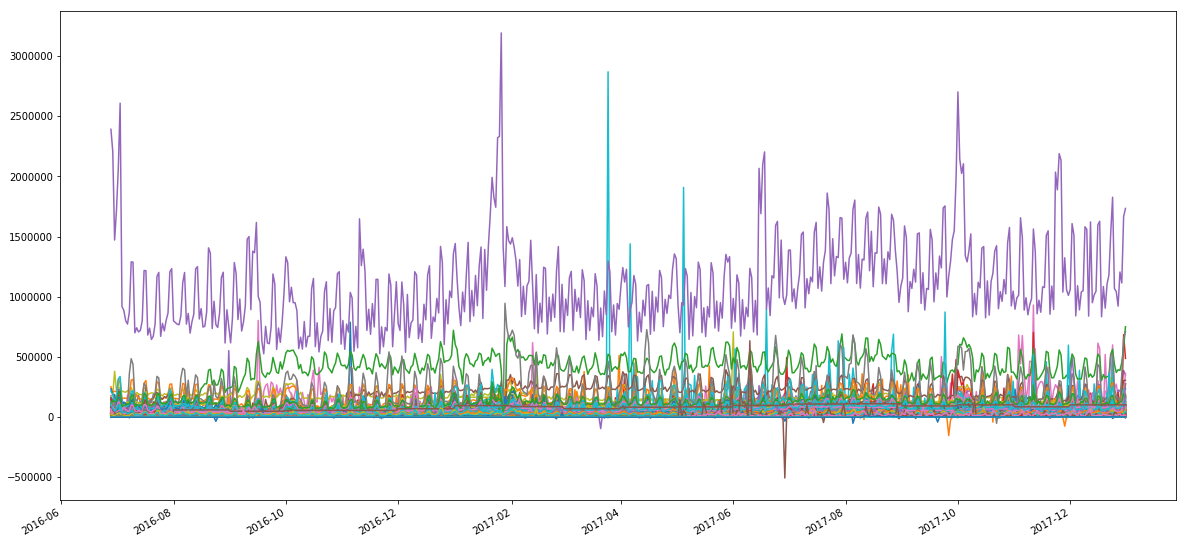

In [44]:
z.plot(figsize=(20,10),legend=False)

### 绘制整个商场销售额图

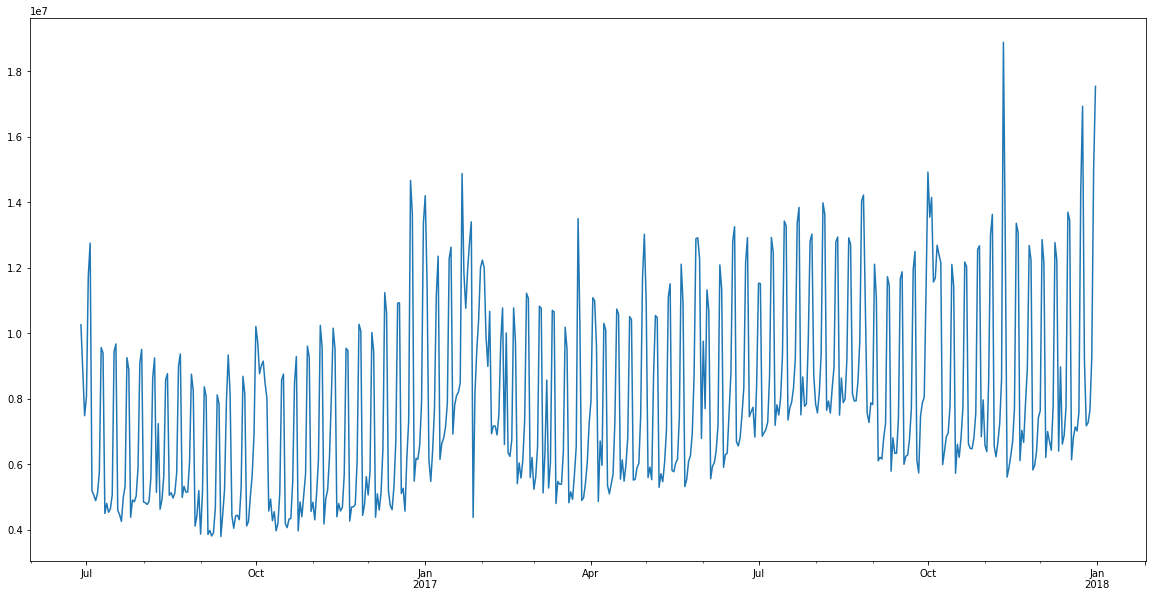

In [45]:
datesum=z.apply(sum,axis=1)
datesum.plot(figsize=(20,10),legend=False)

In [102]:
datesum.argmax()

/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.


Timestamp('2017-11-11 00:00:00')

从图中可以发现，销售额受节假日（周末）影响很大，总体上以节假日周期性起伏波动。在遇到大型公众假期时会有更大的波动。
图中单日商场销售额最大值出现在2017年的“双十一”。

## 拟合数据

拟合数据可以有两种思路：
- 先预测单个商铺销售额，再得到整个商场销售总额
- 由单日销售总额预测整个商场销售总额

可以从销售数据中发现，商铺的租期不定，商铺会不定期关闭，这会给数据预测带来困难。
经过简单的实践后发现对单个商铺的预测误差较大，多个商铺误差累积将会造成更大的误差，故没有采用这种方法。
对整个商场销售总额预测可以对个别商铺的波动有所抵消，并对整体趋势有所把握。

对于预测方法，可以将时间序列转换成监督学习的方式（每个X的Y为后一天的数据）再用LSTM进行训练。
实践中发现，在转换为监督学习后，预测时需要提供具体的销售数据来预测后一天的销售额，虽然拟合数据效果不错，但是这种需要提供更新数据的方式对于需要预测较长时间后数据的情况不太适用。

这里采用了**Facebook**发布的开源工具 [Prophet](https://github.com/facebook/prophet) 进行预测，Prophet是个基于Python和R语言的预测工具,适用于具有明显的内在规律（或者说，模式）的商业行为数据,支持使用日序列甚至小时序列的数据进行预测。它基于如下模型:
$$y(t)=g(t)+s(t)+h(t)+\varepsilon_t$$
其中 $g(t)$ 是趋势项，$s(t)$ 是周期项， $h(t)$ 是节假日项， $\varepsilon_{t}$ 是误差项并且服从正态分布,对于周期和节假日有较好拟合效果，详细内容请[参阅](https://peerj.com/preprints/3190/)。

In [46]:
%matplotlib inline
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt

In [47]:
df=pd.DataFrame(datesum)

In [48]:
df.columns=['y']

组合数据，由于销售额数据较大，这里对其数值取自然对数。

In [49]:
dates = pd.date_range('6/28/2016','12/31/2017')
df.insert(0,'ds',dates)
df.index=range(552)
df['y']=np.log(df['y'])

In [50]:
df.head()

,ds,y
0,2016-06-28,16.143530
1,2016-06-29,15.998264
2,2016-06-30,15.827931
3,2016-07-01,15.902701
4,2016-07-02,16.278183


绘制训练数据图像

Text(0.5,0,'Date')

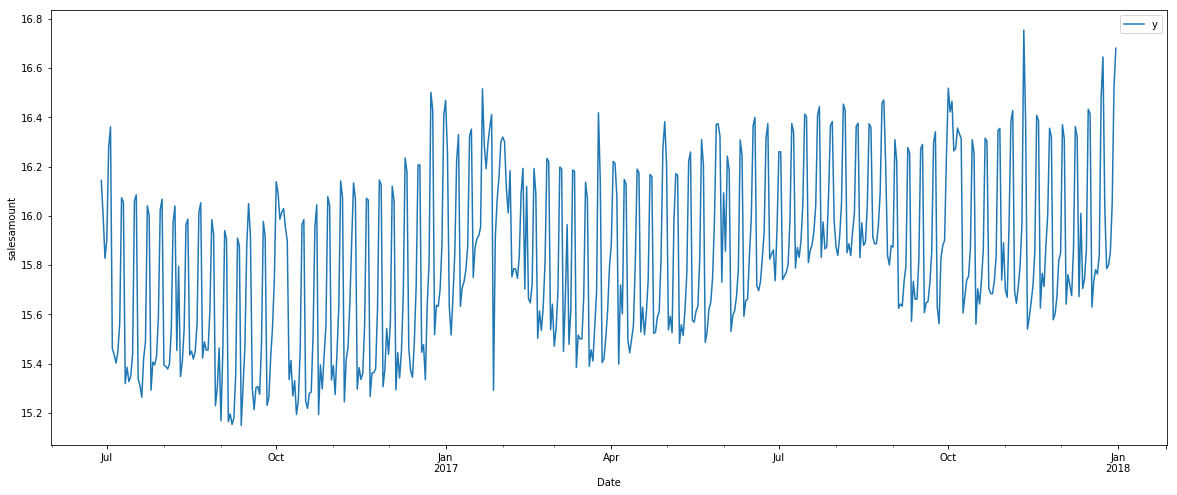

In [51]:
ax = df.set_index('ds').plot(figsize=(20, 8))
ax.set_ylabel('salesamount')
ax.set_xlabel('Date')

In [52]:
# 拟合模型
m = Prophet()
m.fit(df)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda/envs/py35/lib/python3.5/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [103]:
# 构建待预测日期数据框，periods = 90 代表除历史数据的日期外再往后推 90 天
# 这里只需要提供需要预测的天数即可，不需要提供额外数据
future = m.make_future_dataframe(periods=90)
future.tail()

,ds
637,2018-03-27
638,2018-03-28
639,2018-03-29
640,2018-03-30
641,2018-03-31


In [54]:
# 预测数据集
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(90)

,ds,yhat,yhat_lower,yhat_upper
552,2018-01-01,15.742455,15.515689,15.943586
553,2018-01-02,15.790109,15.568998,15.993081
554,2018-01-03,15.754124,15.545547,15.971851
555,2018-01-04,15.805106,15.570248,16.021447
556,2018-01-05,15.924856,15.715884,16.155450
557,2018-01-06,16.345418,16.135253,16.568908
558,2018-01-07,16.341597,16.123150,16.576080
559,2018-01-08,15.741528,15.507133,15.959409
560,2018-01-09,15.789181,15.571337,15.992629
561,2018-01-10,15.753197,15.558137,15.954271


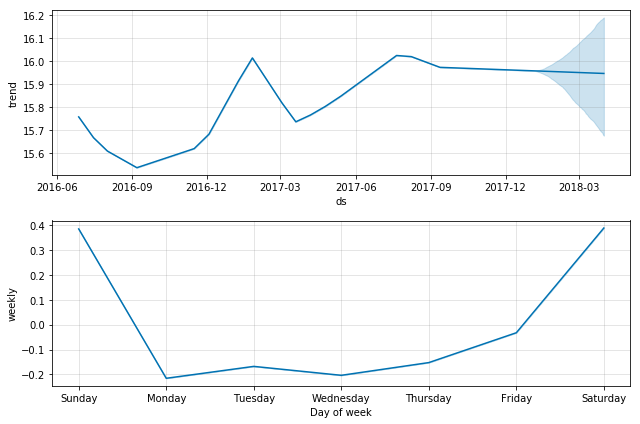

In [55]:
# 预测的成分分析绘图，展示预测中的趋势、周效应和年度效应
# 这里因为训练数据较少，年度效应没有体现
m.plot_components(forecast);

上图显示了销售额的趋势以及每周销售额变化，可以发现，周末的销售额相对较高。

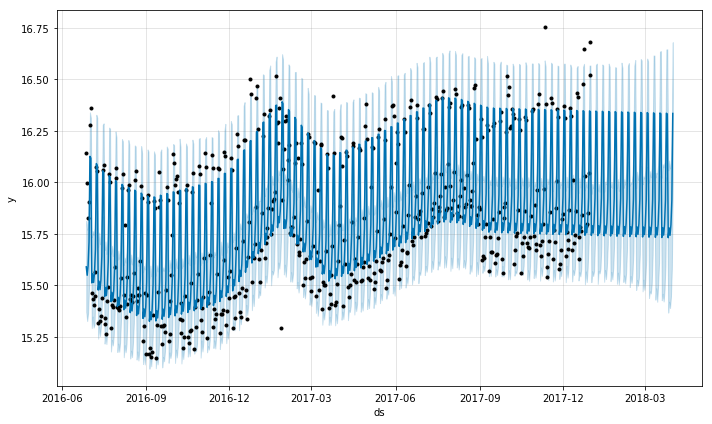

In [56]:
# 展示预测结果
m.plot(forecast);

上图中黑点代表实际数值，深蓝色线条代表拟合线条，浅色为拟合结果的置信区间。

In [57]:
#加入法定节假日
lawholiday = pd.DataFrame({
  'holiday': 'law',
  'ds': pd.to_datetime(['2016-9-15','2016-9-16','2016-9-17','2016-10-1','2016-10-2','2016-10-3','2016-10-4','2016-10-5','2016-10-6','2016-10-7','2017-1-1','2017-1-2','2017-1-27','2017-1-28','2017-1-29','2017-1-30','2017-1-31','2017-2-1','2017-2-2','2017-4-2','2017-4-3','2017-4-4','2017-5-1','2017-5-28','2017-5-29','2017-5-30','2017-10-1','2017-10-2','2017-10-3','2017-10-4','2017-10-5','2017-10-6','2017-10-7','2017-10-8','2018-1-1','2018-2-15','2018-2-16','2018-2-17','2018-2-18','2018-2-19','2018-2-20','2018-2-21']),
  'lower_window': -1,
  'upper_window': 1,
})
m = Prophet(holidays=lawholiday)
forecast = m.fit(df).predict(future)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda/envs/py35/lib/python3.5/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


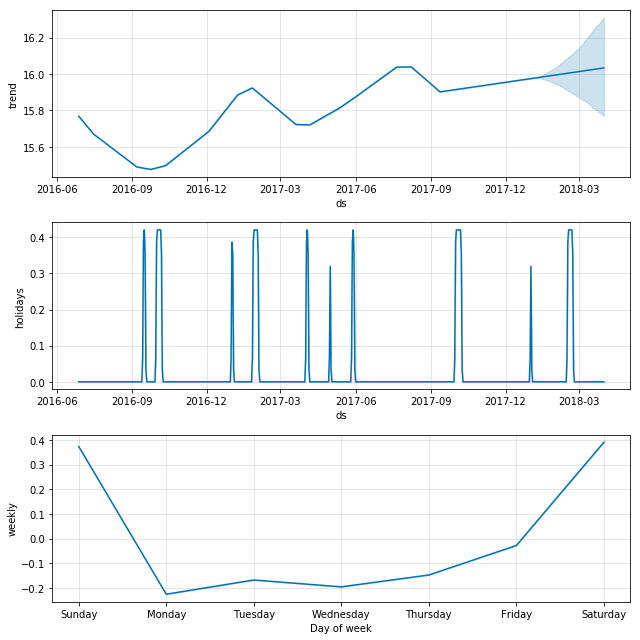

In [58]:
# 预测的成分分析绘图，展示预测中的趋势、周效应和假日效应
m.plot_components(forecast);

加入法定节假日后，可以看到增加了假日趋势，每个假日中，销售额明显提升。

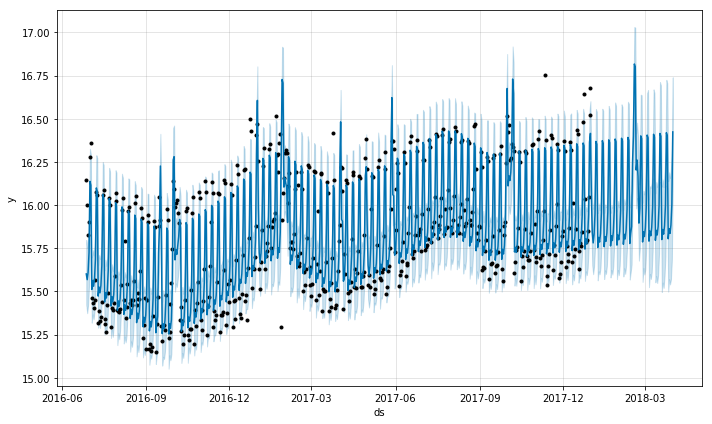

In [85]:
# 展示预测结果
m.plot(forecast);

在加入节假日后，整体拟合效果有所改变，节假日销售额提升明显，但具体效果需要进一步计算。

In [62]:
futuresaleamount=table.ix[:,552:]
test=futuresaleamount.apply(sum)
test=test.values

In [79]:
yhat=forecast['yhat'][552:]
yhat=(math.e)**(yhat.values)

### 绘制预测值和实际值曲线

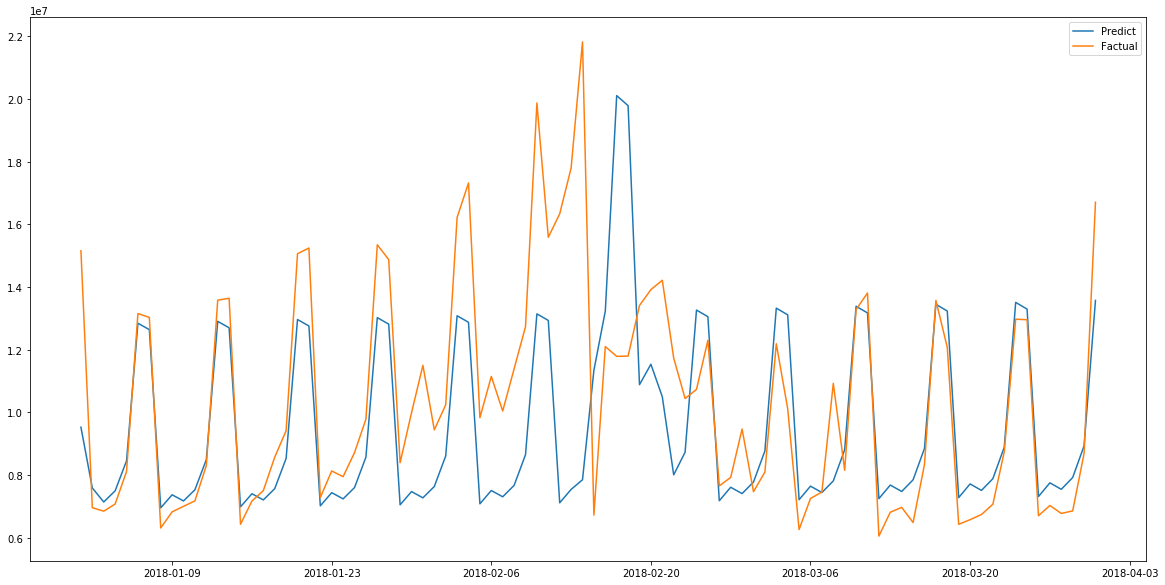

In [100]:
plt.figure(figsize=(20,10))
plt.plot(forecast['ds'][-90:],yhat,label='Predict')
plt.plot(forecast['ds'][-90:],test,label='Factual')
plt.legend()

从图中可以看到，预测效果在周期性起伏上拟合较好，在春节期间有一定偏差，没有体现出节日的前期效果和滞后效果。

### 计算平均绝对百分误差 MAPE

In [84]:
np.mean(np.abs(yhat-test)/test)

0.16644500194277517

In [278]:
np.mean(np.abs(yhat-test))

1961272.298480255

MAPE体现了预测值和实际值偏差的百分比的平均值，数值越小越好。实际误差平均值在两百万左右。

### 以周为周期预测

In [108]:
weekly=z.apply(sum,axis=1).resample('7D').sum()

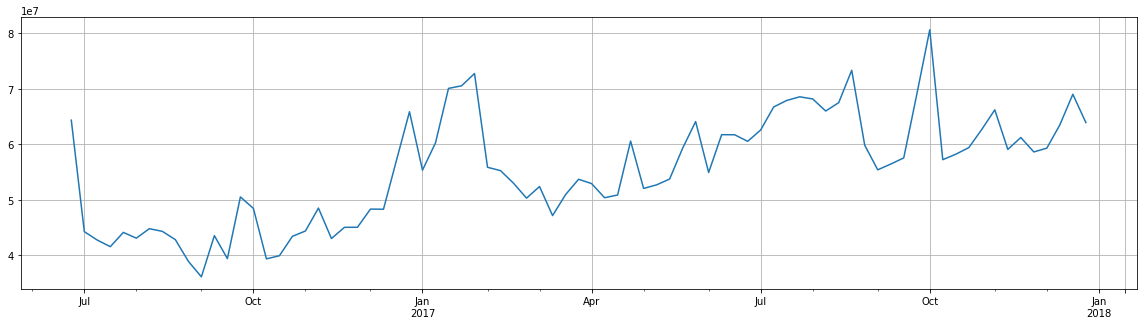

In [113]:
weekly.plot(figsize=(20,5),legend=False,grid=True)

In [180]:
weekdf=pd.DataFrame(weekly)

In [182]:
weekdf.columns=['y']

In [183]:
weekdf.insert(0,'ds',weekdf.index)

In [186]:
weekdf['y']=np.log(weekdf['y'])

In [190]:
# 拟合模型
mweek = Prophet()
mweek.fit(weekdf)
future = mweek.make_future_dataframe(periods=13,freq='W')
future.tail()

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda/envs/py35/lib/python3.5/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


,ds
87,2018-02-25
88,2018-03-04
89,2018-03-11
90,2018-03-18
91,2018-03-25


In [265]:
# 预测数据集
forecast = mweek.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
16,2017-11-30,17.948152,17.834116,18.066853
17,2017-12-31,17.939601,17.820987,18.045378
18,2018-01-31,17.931050,17.809705,18.054026
19,2018-02-28,17.923327,17.782250,18.074097
20,2018-03-31,17.914776,17.726563,18.093401


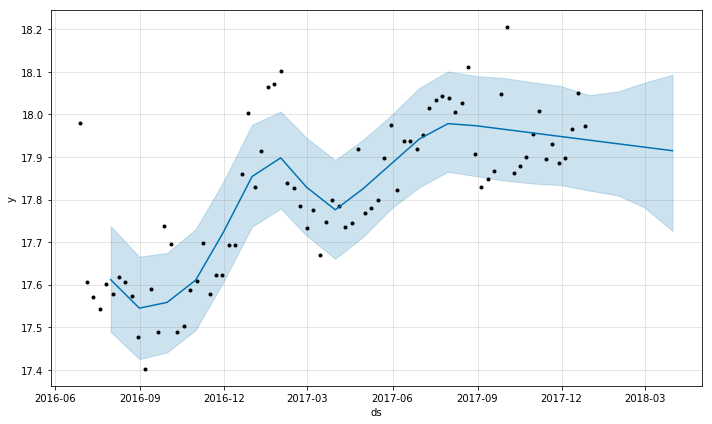

In [266]:
mweek.plot(forecast);

In [203]:
weektest=futuresaleamount.apply(sum).resample('7D').sum()

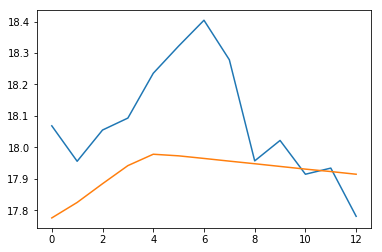

In [267]:
plt.plot(np.log(weektest.values))
plt.plot(forecast['yhat'].tail(13).values)

从上图可以看到，以周为周期预测结果和实际数值有一定差距。

In [273]:
futureweek=weektest.values
futureweekpre=(math.e)**forecast['yhat'].tail(13).values
np.mean(np.abs(futureweek-futureweekpre)/futureweek)

0.16032287699151676

In [274]:
(futureweek-futureweekpre)

array([17843589.8195921 ,  7705019.17147826, 10883890.18480375,
       10107724.33771009, 18850071.3758129 , 26676519.40060659,
       34961714.72437079, 23891778.17752923,   567314.81754602,
        5319909.76314335,  -989060.25294134,   669445.2949084 ,
       -7547994.36021966])

In [275]:
futureweek

array([70324716.924     , 62831946.066     , 69388827.558     ,
       72078725.76599999, 83103224.91599998, 90603569.03      ,
       98361943.336     , 86752185.63400002, 62909691.402     ,
       67131472.27199998, 60296207.79599999, 61483203.296     ,
       52747964.98600002])

计算发现，预测误差从五百万到两千多万不等,这个误差稍大。

### 以月为周期预测

In [132]:
z.index=dates

In [143]:
months=['2016-7','2016-8','2016-9','2016-10','2016-11','2016-12','2017-1','2017-2','2017-3','2017-4','2017-5','2017-6','2017-7','2017-8','2017-9','2017-10','2017-11','2017-12']
monthly=[]
for i in range(len(months)):
    mon=z.loc[months[i]].apply(sum,axis=1).sum()
    monthly.append(mon)

In [144]:
monthly

[205598292.64600003,
 189526252.22800002,
 170204062.628,
 199887684.14799994,
 191361637.18599996,
 228620384.05399996,
 293884065.70199996,
 231074060.39400005,
 218280933.05000004,
 233833669.53199998,
 247803469.74599996,
 254044805.91199997,
 295660709.12,
 297727491.926,
 247013998.97799996,
 291912373.544,
 261020582.49399996,
 294578704.57199997]

In [155]:
monly=pd.DataFrame(monthly)
#monly.index=monly
monly.columns=['y']
datesmont = pd.date_range('7/1/2016','12/31/2017',freq='M')
monly.insert(0,'ds',datesmont)
monly['y']=np.log(monly['y'])

Text(0.5,0,'Date')

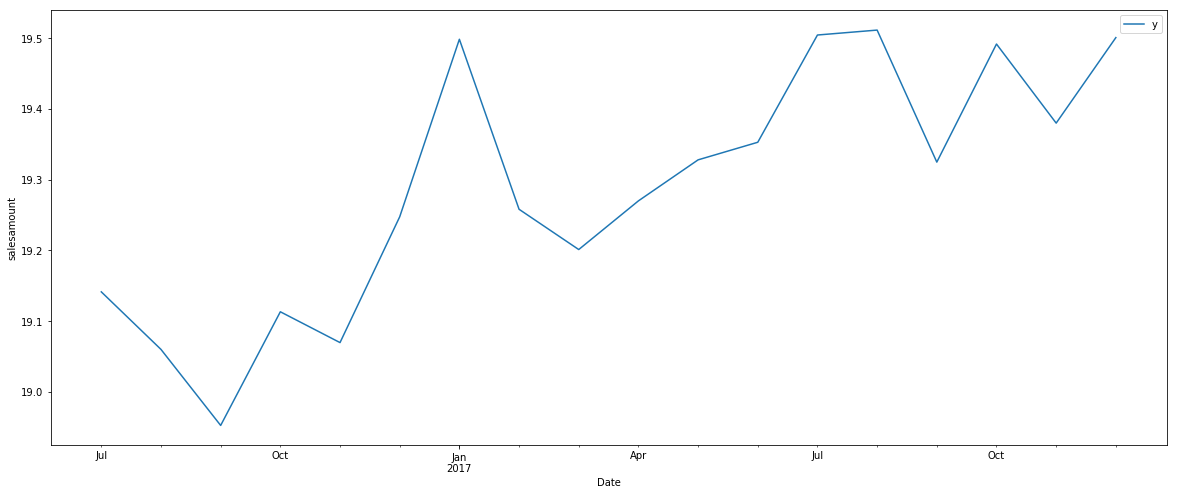

In [169]:
ax = monly.set_index('ds').plot(figsize=(20, 8))
ax.set_ylabel('salesamount')
ax.set_xlabel('Date')

In [170]:
# 拟合模型
mmonth = Prophet()
mmonth.fit(monly)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 13.0.
/anaconda/envs/py35/lib/python3.5/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [246]:
future = mmonth.make_future_dataframe(periods=3,freq='M')
future.tail()

,ds
16,2017-11-30
17,2017-12-31
18,2018-01-31
19,2018-02-28
20,2018-03-31


In [247]:
# 预测数据集
forecast = mmonth.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
16,2017-11-30,19.460885,19.345112,19.588743
17,2017-12-31,19.476226,19.350268,19.605068
18,2018-01-31,19.491567,19.371337,19.634460
19,2018-02-28,19.505424,19.382348,19.634744
20,2018-03-31,19.520765,19.391311,19.640213


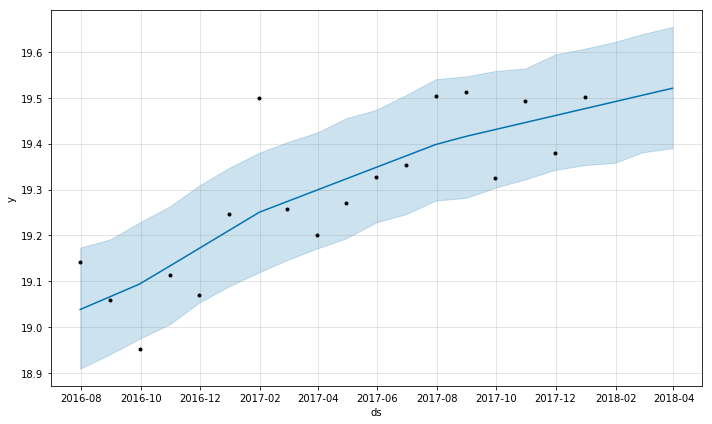

In [197]:
mmonth.plot(forecast);

In [231]:
ft=futuresaleamount.T

In [235]:
ft.index=pd.date_range('1/1/2018','3/31/2018')

In [242]:
jan=ft['2018-1'].apply(sum,axis=1).sum()
feb=ft['2018-2'].apply(sum,axis=1).sum()
mar=ft['2018-3'].apply(sum,axis=1).sum()

In [243]:
futuremon=[jan,feb,mar]

In [244]:
futuremon

[304502113.17599994, 353985483.59999996, 279526082.20600003]

In [251]:
futuremonpre=(math.e)**forecast[-3:]['yhat']

In [256]:
np.mean(np.abs(futuremonpre-futuremon)/futuremon)

0.09357742388104974

In [258]:
(futuremonpre-futuremon)

18   -1.270558e+07
19   -5.811754e+07
20    2.091580e+07
Name: yhat, dtype: float64

计算发现，预测误差都在一千万以上。不过相比每月销售额3亿来说，这个误差还是能够接受。